In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
df = pd.read_excel(r"C:\Users\AJAY\Desktop\dummy\diminos_data.xlsx")

In [37]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619


In [38]:
df.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.673
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [40]:
df["time_taken"] = df["order_delivered_at"]-df["order_placed_at"]

In [41]:
df["time_taken"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: time_taken
Non-Null Count  Dtype          
--------------  -----          
15000 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 117.3 KB


In [42]:
# here i got a problem that when i when i subtracted two datetime columns  (df["order_delivered_at"],df["order_placed_at"])
# df["time_taken"] column converted into timedelta64[ns] (we can't perform df["time_taken"].dt.minute)
# so
df["time_taken(minutes)"]=df["time_taken"].dt.total_seconds()/60

In [43]:
df

,order_id,order_placed_at,order_delivered_at,time_taken,time_taken(minutes)
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443,0 days 00:17:08.443000,17.140717
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925,0 days 00:15:35.925000,15.598750
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291,0 days 00:15:06.291000,15.104850
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019,0 days 00:38:32.019000,38.533650
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619,0 days 00:16:10.619000,16.176983
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409,0 days 00:15:32.409000,15.540150
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.673,0 days 00:16:44.673000,16.744550
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676,0 days 00:15:24.676000,15.411267
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810,0 days 00:15:57.810000,15.963500


In [44]:
df["time_taken(minutes)"].describe() 

count    15000.000000
mean        20.499389
std         96.160362
min         15.000017
25%         15.274821
50%         15.797992
75%         17.279658
max       7299.831367
Name: time_taken(minutes), dtype: float64

In [45]:
 # here the max value is 7299 minutes (5day approx) .there may be the outleirs
 # and also the at 75% quantile the data is bit more means it is so what right skewed
 # shows huge spread of data (std is more means variance is more)

<Axes: ylabel='Density'>

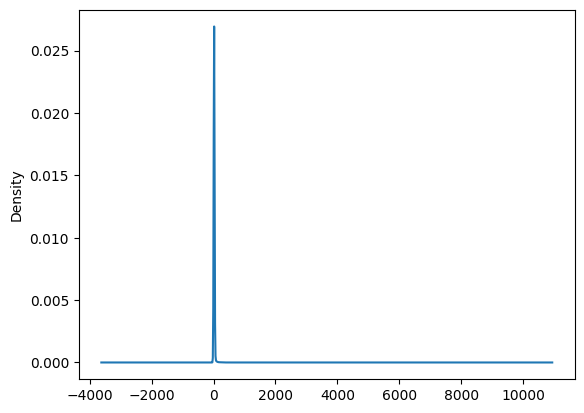

In [46]:
df["time_taken(minutes)"].plot(kind="density") 

<Axes: >

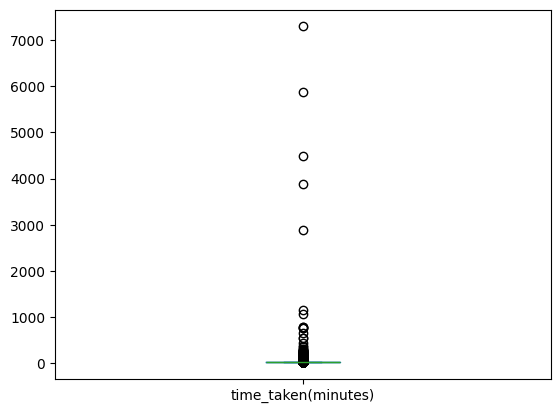

In [47]:
df["time_taken(minutes)"].plot(kind="box")

In [48]:
# right skewed
# huge outliers
#lypo kurtuious

<Axes: xlabel='time_taken(minutes)', ylabel='None'>

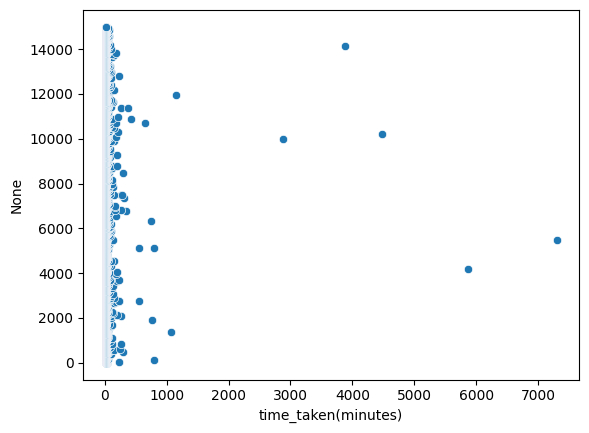

In [49]:
sns.scatterplot(x=df["time_taken(minutes)"],y=df["time_taken(minutes)"].index)

In [50]:
#most of the data lies in between 0-1000 min (approx by lookin the scatter)


In [51]:
np.percentile(df["time_taken(minutes)"],95)

np.float64(27.261051666666656)

In [52]:
# there is process for analizing the data
# 1 data collection 
#     here the user already given the data so just load the data
# 2 data cleaning 
#     look head and tail of the data to understand
#     use df.info() to check is the dtype is correct for each column and also null values
#     luckyly the data is cleaned 
# 3 analyze the data 
#     by ploting the data in box,density and scatter if find that there is an outliers
#     here we have 3 options 
#         1 drop the rows
#         2 replace it with mean median or mode
#         3 stay as it is
# 4 insights
#     the question is "Is 95th Percentile on Order Delivery time is less than 31 mins."
#     the ans is "yes" the 95 percet of the orders are delivering les than 31 minutes(to be presice it is 27.26)
# 5 data driven decisions
#     there is an outliers we have to remove i explained why it has to remove in below cell
#     in simple the data show the pizzas delivered more than 4 days.focus on that .
    

In [53]:
# I analyzed the data if outliers are removed below.

In [54]:
#  we should remove the "outliers" because  
# the pizza will spoil after a day  but here the time taken more than a 2 day.
# the customer won't wait whole day because the dominos said it will you get it in 30 min
# there is a huge probablity there may be mistake or human errors in the data
# that is why i am removing the outliers


In [55]:
q1 = df["time_taken(minutes)"].quantile(0.25)
q3 = df["time_taken(minutes)"].quantile(0.75)

IQR = q3-q1

min = q1-1.5*IQR
max = q3+1.5*IQR

cleaned_data = df["time_taken(minutes)"][(df["time_taken(minutes)"]>min) & (df["time_taken(minutes)"]<max)]

In [56]:
cleaned_data.describe()

count    13266.000000
mean        16.086537
std          1.173566
min         15.000017
25%         15.234167
50%         15.639375
75%         16.526483
max         20.276300
Name: time_taken(minutes), dtype: float64

<Axes: >

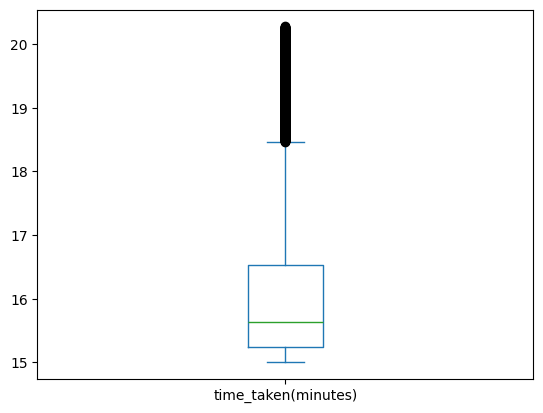

In [57]:
cleaned_data.plot(kind="box")

<Axes: ylabel='Density'>

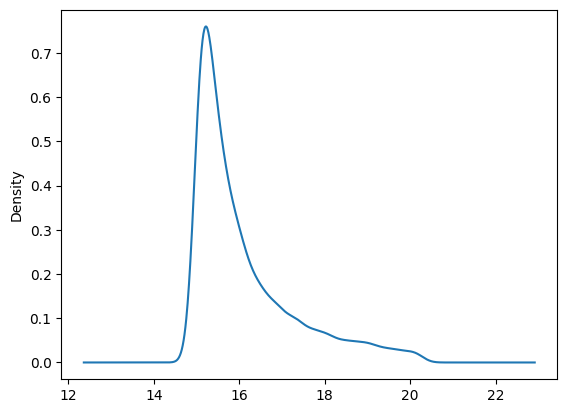

In [58]:
cleaned_data.plot(kind="density")

In [59]:
np.percentile(cleaned_data,95)

np.float64(18.789391666666667)

In [60]:
# the 95 percent of the orders are delivered in 19 minutes(with outliers 27 min)